# 1 - GET TWITTER DATA

In [40]:
#Libraries
import twint
import pandas as pd
from flask import request, jsonify, Flask
import json
import requests

In [41]:
import nest_asyncio
nest_asyncio.apply()



In [42]:
language = 'es'
limit = 3000
since = '2022-11-21' 
until = '2023-03-07'
search = '@TheBridge_Tech'


In [43]:
#Load Tweets
# Configure
c = twint.Config()
c.Since = since
c.Until = until 
c.Search = search
c.Limit = limit
c.Pandas = True
# Run
twint.run.Search(c)


1632767114380492803 2023-03-06 16:36:30 +0100 <TheBridge_Tech> ¡Evento #desarrolloweb en #Sevilla con Diego Freniche Brito, Developer Advocate en @MongoDB!  Cambiamos de ubicación ¡Te esperamos en @espacio_RES!  📅16 marzo ⏰18 h 📍En @espacio_RES   Entradas 👉 https://t.co/MJ21xSfIX0  https://t.co/bYJuYAaZ6N
1632746286133702658 2023-03-06 15:13:44 +0100 <TheBridge_Tech> ¡Súper contentos de participar! Las temáticas prometen, sin duda 🤩 ¡No te lo pierdas!   📍Universidad @pablodeolavide Sevilla 🎟Entradas  https://t.co/jFvxqPvKTO
1632692123412594688 2023-03-06 11:38:30 +0100 <ESOLIUPO> Las inscripciones se realizarán por Eventbrite. Cualquier duda estamos por MD o al correo info@esoliupo.es  https://t.co/xhVr7VXcF3  @epsUPO @TheBridge_Tech
1632692120719859712 2023-03-06 11:38:30 +0100 <ESOLIUPO> ¡Por fin podemos publicar el cartel con los ponentes para el #cybersecTalks! Si estás interesadx en alguna de las temáticas que aparecen no dudes en venir, es totalmente gratuito gracias al patrocini

In [44]:
df = twint.storage.panda.Tweets_df
df

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1632767114380492803,1632767114380492803,1.678117e+12,2023-03-06 16:36:30,+0100,,¡Evento #desarrolloweb en #Sevilla con Diego F...,es,"[desarrolloweb, sevilla]",[],...,,,,,,[],,,,
1,1632746286133702658,1632746286133702658,1.678112e+12,2023-03-06 15:13:44,+0100,,¡Súper contentos de participar! Las temáticas ...,es,[],[],...,,,,,,[],,,,
2,1632692123412594688,1632692120719859712,1.678099e+12,2023-03-06 11:38:30,+0100,,Las inscripciones se realizarán por Eventbrite...,es,[],[],...,,,,,,[],,,,
3,1632692120719859712,1632692120719859712,1.678099e+12,2023-03-06 11:38:30,+0100,,¡Por fin podemos publicar el cartel con los po...,es,[cybersectalks],[],...,,,,,,[],,,,
4,1632664546665025536,1632664546665025536,1.678093e+12,2023-03-06 09:48:56,+0100,,"Encuentro de la @mlopscommunity en Madrid: ""ML...",es,[mlops],[],...,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1595359906747617280,1595359906747617280,1.669198e+12,2022-11-23 11:13:36,+0100,,¡Ven a conocer los BBK bootcamps powered by @T...,es,"[uxui, ciber, desarrollowebfullstack, datascie...",[],...,,,,,,[],,,,
171,1594975696614526979,1594968601265586178,1.669107e+12,2022-11-22 09:46:53,+0100,,@HoplaSoftware Deseando teneros @HoplaSoftware...,es,"[recruiterscorner, cloud, talentodigital]",[],...,,,,,,"[{'screen_name': 'HoplaSoftware', 'name': 'Hop...",,,,
172,1594968601265586178,1594968601265586178,1.669105e+12,2022-11-22 09:18:42,+0100,,Acelerando juntos el #talentodigital en España...,es,"[talentodigital, ceo, carrerarofesional]",[],...,,,,,,[],,,,
173,1594965197613322241,1594965197613322241,1.669104e+12,2022-11-22 09:05:10,+0100,,"Ikasi gaur etorkizuneko lanbideak, izena eman ...",eu,[bbkbootcamp],[],...,,,,,,[],,,,


### We see that this library works but we can't get the tweet impact data, as required. We will use TheBridge Staff API

In [52]:
response = requests.get('http://apptwitter-env.eba-dbici4gv.us-east-2.elasticbeanstalk.com/tweets?a%C3%B1o=2022')
data = response.json()
data

{'data': [{'author_id': '1151510939105144834',
   'created_at': '2022-12-29T16:39:19.000Z',
   'edit_history_tweet_ids': ['1608502937332113408'],
   'id': '1608502937332113408',
   'public_metrics': {'impression_count': 113,
    'like_count': 4,
    'quote_count': 0,
    'reply_count': 0,
    'retweet_count': 1},
   'text': 'Empieza el año formándote en una de las profesiones con más 𝗱𝗲𝗺𝗮𝗻𝗱𝗮 𝗹𝗮𝗯𝗼𝗿𝗮𝗹. ⚠\n\nToma las riendas del 2023 y vente el 12/01 al Open Day donde te contaremos todo sobre los Bootcamps que te cambiarán la vida junto a @TheBridge_Tech. 🤯\n\nhttps://t.co/RnAcI6FUzc'},
  {'author_id': '570795448',
   'created_at': '2022-12-29T12:52:11.000Z',
   'edit_history_tweet_ids': ['1608445776732246017'],
   'id': '1608445776732246017',
   'public_metrics': {'impression_count': 124,
    'like_count': 2,
    'quote_count': 0,
    'reply_count': 0,
    'retweet_count': 0},
   'text': 'Los 4 bootcamps tecnológicos de EDEM y @TheBridge_Tech en los empleos más demandados 🔝\n\n▶ Data Sci

In [46]:
df = pd.DataFrame(data['data'])
df.head()

,author_id,created_at,edit_history_tweet_ids,id,public_metrics,text
0,1151510939105144834,2022-12-29T16:39:19.000Z,[1608502937332113408],1608502937332113408,"{'impression_count': 113, 'like_count': 4, 'qu...",Empieza el año formándote en una de las profes...
1,570795448,2022-12-29T12:52:11.000Z,[1608445776732246017],1608445776732246017,"{'impression_count': 124, 'like_count': 2, 'qu...",Los 4 bootcamps tecnológicos de EDEM y @TheBri...
2,1128860148,2022-12-29T09:16:11.000Z,[1608391421014196224],1608391421014196224,"{'impression_count': 49, 'like_count': 2, 'quo...",@EDEMempresarios acoge el 12 de enero un Open ...
3,570795448,2022-12-27T09:00:57.000Z,[1607662809575292929],1607662809575292929,"{'impression_count': 218, 'like_count': 5, 'qu...",Si estás buscando una profesión que te cambie ...
4,1162694149956603904,2022-12-23T12:54:06.000Z,[1606271930763354112],1606271930763354112,"{'impression_count': 120, 'like_count': 1, 'qu...",En @TheBridge_Tech tenemos un deseo para ti💫\n...


In [47]:
#Convert diccionary in public_metrics into different df columns

df[['impression_count', 'like_count', 'quote_count', 'reply_count', 'retweet_count']] = df['public_metrics'].apply(lambda x: pd.Series([x['impression_count'], x['like_count'], x['quote_count'], x['reply_count'], x['retweet_count']]))

#drop origin column

df.drop(['public_metrics', 'edit_history_tweet_ids'], axis=1, inplace=True)

In [48]:
df.head()

,author_id,created_at,id,text,impression_count,like_count,quote_count,reply_count,retweet_count
0,1151510939105144834,2022-12-29T16:39:19.000Z,1608502937332113408,Empieza el año formándote en una de las profes...,113,4,0,0,1
1,570795448,2022-12-29T12:52:11.000Z,1608445776732246017,Los 4 bootcamps tecnológicos de EDEM y @TheBri...,124,2,0,0,0
2,1128860148,2022-12-29T09:16:11.000Z,1608391421014196224,@EDEMempresarios acoge el 12 de enero un Open ...,49,2,0,0,0
3,570795448,2022-12-27T09:00:57.000Z,1607662809575292929,Si estás buscando una profesión que te cambie ...,218,5,0,0,0
4,1162694149956603904,2022-12-23T12:54:06.000Z,1606271930763354112,En @TheBridge_Tech tenemos un deseo para ti💫\n...,120,1,0,0,1


In [49]:
#2023 data

response = requests.get('http://apptwitter-env.eba-dbici4gv.us-east-2.elasticbeanstalk.com/tweets?a%C3%B1o=2023')
data = response.json()
df_23 = pd.DataFrame(data['data'])




In [50]:
#data processing

df_23 = pd.DataFrame(data['data'])

#Convert diccionary in public_metrics into different df columns

df_23[['impression_count', 'like_count', 'quote_count', 'reply_count', 'retweet_count']] = df_23['public_metrics'].apply(lambda x: pd.Series([x['impression_count'], x['like_count'], x['quote_count'], x['reply_count'], x['retweet_count']]))

#drop origin column

df_23.drop(['public_metrics', 'edit_history_tweet_ids'], axis=1, inplace=True)

df_23

,author_id,created_at,id,text,impression_count,like_count,quote_count,reply_count,retweet_count
0,936539844079218688,2023-03-07T17:16:14.000Z,1633154604018876416,¡Hola #dataholics! La primavera trompetera se ...,357,8,1,0,3
1,1585726199485140993,2023-03-06T10:38:30.000Z,1632692123412594688,Las inscripciones se realizarán por Eventbrite...,31,0,0,0,0
2,1585726199485140993,2023-03-06T10:38:30.000Z,1632692120719859712,¡Por fin podemos publicar el cartel con los po...,950,5,1,1,3
3,41545659,2023-03-06T08:48:56.000Z,1632664546665025536,"Encuentro de la @mlopscommunity en Madrid: ""ML...",90,3,0,0,1
4,925597948410580993,2023-03-04T22:32:56.000Z,1632147141224275970,@nodosenlared @snowded @TheBridge_Tech Muy bue...,35,1,0,0,0
...,...,...,...,...,...,...,...,...,...
84,271028835,2023-01-07T19:55:52.000Z,1611813891322908672,🚀 @EDEMempresarios y @TheBridge_Tech se alía...,166,7,0,0,2
85,1530194743786881024,2023-01-06T12:28:27.000Z,1611338908196913153,Gracias a nuestros amigos @TheBridge_Tech por ...,51,2,0,0,0
86,10279282,2023-01-04T15:02:11.000Z,1610652818234347521,¿Te interesa el diseño de #producto digital? V...,82,3,0,0,2
87,2402179123,2023-01-04T11:57:41.000Z,1610606391445815297,¡Empezamos el año con una #masterclass de #uxu...,116,3,0,0,2


In [51]:
df_sum = pd.concat([df, df_23]).reset_index(drop=True)
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   author_id         149 non-null    object
 1   created_at        149 non-null    object
 2   id                149 non-null    object
 3   text              149 non-null    object
 4   impression_count  149 non-null    int64 
 5   like_count        149 non-null    int64 
 6   quote_count       149 non-null    int64 
 7   reply_count       149 non-null    int64 
 8   retweet_count     149 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 10.6+ KB


In [13]:
df_sum.head()

,author_id,created_at,id,text,impression_count,like_count,quote_count,reply_count,retweet_count
0,1151510939105144834,2022-12-29T16:39:19.000Z,1608502937332113408,Empieza el año formándote en una de las profes...,113,4,0,0,1
1,570795448,2022-12-29T12:52:11.000Z,1608445776732246017,Los 4 bootcamps tecnológicos de EDEM y @TheBri...,124,2,0,0,0
2,1128860148,2022-12-29T09:16:11.000Z,1608391421014196224,@EDEMempresarios acoge el 12 de enero un Open ...,49,2,0,0,0
3,570795448,2022-12-27T09:00:57.000Z,1607662809575292929,Si estás buscando una profesión que te cambie ...,218,5,0,0,0
4,1162694149956603904,2022-12-23T12:54:06.000Z,1606271930763354112,En @TheBridge_Tech tenemos un deseo para ti💫\n...,120,1,0,0,1


In [71]:
df_sum.to_csv('tweets_23&23_@TheBridge.csv')

#### prueba para relacionar author_id con username (futuras mejoras)

In [2]:
import twitterUsernameviaUserID

In [14]:
from twitterUsernameviaUserID import getHandles as gH
    # A dictionary with mapped user ids to their usernames
temp= gH.getHandles('1128860148')

No usernames provided


# 2 - DATABASE CONECTION


In [ ]:
# AWS MySQL notebook 

# 3 - BUSSINESS QUESTIONS

A - HIGHEST IMPACT TWEET

In [27]:
df_sum.sort_values('impression_count', ascending=False).head()

,author_id,created_at,id,text,impression_count,like_count,quote_count,reply_count,retweet_count
136,41545659,2023-01-15T13:16:23.000Z,1614612463361695747,"Advanced #Cynefin, Estuarine mapping &amp; EUF...",225761,321,4,7,49
130,7154412,2023-01-18T18:06:30.000Z,1615772633773256706,En plena meet-up de CPS en @TheBridge_Tech con...,6600,35,1,2,5
72,1207228796593745920,2023-03-02T10:44:35.000Z,1631244101902270464,Este 14 de Marzo hay meetup en Madrid de @Bitc...,2331,21,1,2,11
135,41545659,2023-01-15T13:16:24.000Z,1614612464657653760,@snowded @TheBridge_Tech Se trata de un taller...,1766,10,0,1,5
66,1003872445,2023-03-04T11:22:58.000Z,1631978537904222211,El meetup del jueves 9 de marzo con @ToniDorta...,1068,9,1,1,3


In [ ]:
hi_tweets = ['https://twitter.com/nodosenlared/status/1614612463361695747', 'https://twitter.com/Recuenco/status/1615772633773256706', 'https://twitter.com/decentralized_b/status/1631244101902270464']
#poner capturas en ppt

B - TOP USERS

In [30]:
df_sum['author_id'].value_counts()

702077405045899264     22
2402179123             11
1162694149956603904     7
1003872445              5
41545659                5
                       ..
763727449               1
2603024598              1
2611663910              1
1065627197115981824     1
271028835               1
Name: author_id, Length: 64, dtype: int64

In [ ]:
top_users = ['@BBK_eus', 
             '@jorgegrev', 
             '@TheBridge_Tech']

C - MONTH WITH THE HIGHEST AMOUNT OF TWEETS

In [63]:
df_datetime = pd.DataFrame(pd.to_datetime(df_sum['created_at']))
df_sum['year'] = df_datetime['created_at'].dt.year

In [66]:
df_sum['month'] = df_datetime['created_at'].dt.month

In [68]:
# df_sum['day'] = df_datetime['created_at'].dt.day

array([29, 27, 23, 22, 21, 16, 13, 12,  7,  6,  5,  3,  2,  1, 30, 28, 24,
        4, 17, 15, 31, 26, 20, 19, 18, 10,  9], dtype=int64)

In [82]:
print('The month with the highest number of tweets was January with 54 tweets:')
df_sum.groupby('month').count().sort_values('id', ascending=False)

The month with the highest number of tweets was January with 54 tweets:


,author_id,created_at,id,text,impression_count,like_count,quote_count,reply_count,retweet_count,year
month,,,,,,,,,,
1,54,54,54,54,54,54,54,54,54,54
11,31,31,31,31,31,31,31,31,31,31
12,29,29,29,29,29,29,29,29,29,29
2,21,21,21,21,21,21,21,21,21,21
3,14,14,14,14,14,14,14,14,14,14


In [157]:
import seaborn as sns

<AxesSubplot:xlabel='month', ylabel='count'>

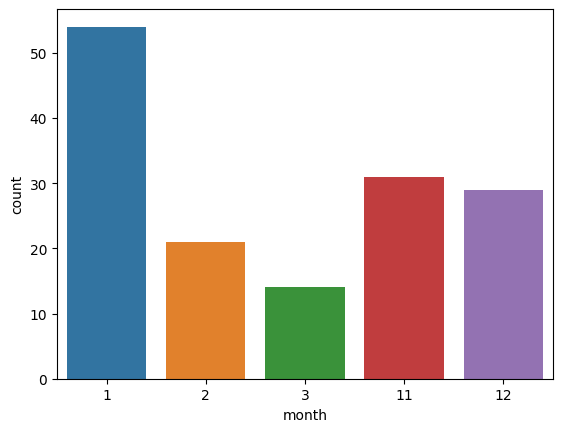

In [160]:
sns.countplot(df_sum, x='month')

D - MORE FREQUENT WORDS


In [85]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [88]:
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [87]:
df_sum['text']

0      Empieza el año formándote en una de las profes...
1      Los 4 bootcamps tecnológicos de EDEM y @TheBri...
2      @EDEMempresarios acoge el 12 de enero un Open ...
3      Si estás buscando una profesión que te cambie ...
4      En @TheBridge_Tech tenemos un deseo para ti💫\n...
                             ...                        
144    🚀 @EDEMempresarios  y @TheBridge_Tech  se alía...
145    Gracias a nuestros amigos @TheBridge_Tech por ...
146    ¿Te interesa el diseño de #producto digital? V...
147    ¡Empezamos el año con una #masterclass de #uxu...
148    🤝 @EDEMempresarios se alía con @TheBridge_Tech...
Name: text, Length: 149, dtype: object

D.1 Para que salga bien vamos a hacer un preprocesado de los textos

In [90]:
#Eliminamos signos de puntuación. 

import re

signos = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\¿)|(\@)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")

def signs_tweets(tweet):
    return signos.sub('', tweet.lower())

df_sum['text'] = df_sum['text'].apply(signs_tweets)
df_sum['text'].head()

0    empieza el año formándote en una de las profes...
1    los  bootcamps tecnológicos de edem y thebridg...
2    edemempresarios acoge el  de enero un open day...
3    si estás buscando una profesión que te cambie ...
4    en thebridge_tech tenemos un deseo para ti💫\n¡...
Name: text, dtype: object

In [98]:
#eliminamos links
def remove_links(df):
    return " ".join(['' if ('http') in word else word for word in df.split()])

df_sum['text'] = df_sum['text'].apply(remove_links)
df_sum['text']

0      empieza el año formándote en una de las profes...
1      los bootcamps tecnológicos de edem y thebridge...
2      edemempresarios acoge el de enero un open day ...
3      si estás buscando una profesión que te cambie ...
4      en thebridge_tech tenemos un deseo para ti💫 ¡q...
                             ...                        
144    🚀 edemempresarios y thebridge_tech se alían pa...
145    gracias a nuestros amigos thebridge_tech por a...
146    te interesa el diseño de #producto digital ven...
147    ¡empezamos el año con una #masterclass de #uxu...
148    🤝 edemempresarios se alía con thebridge_tech p...
Name: text, Length: 149, dtype: object

In [99]:
from langdetect import detect

In [103]:
#create a new coñumn with original language of the tweet

# Load the DataFrame with the text column

# Define a function to detect the language of a text
def detect_language(text):
    try:
        lang = detect(text)
    except:
        lang = 'unknown'
    return lang

# Apply the detect_language function to the text column
df_sum['original_language'] = df_sum['text'].apply(detect_language)
df_sum['original_language'].value_counts()


es    116
en     22
id      7
nl      3
it      1
Name: original_language, dtype: int64

In [110]:
df_sum[df_sum['original_language'] != 'es']

,author_id,created_at,id,text,impression_count,like_count,quote_count,reply_count,retweet_count,year,month,original_language
13,1530194743786881024,2022-12-13T18:53:22.000Z,1602738464902250497,libertariadora javieramaestre kilrau gabohbeau...,0,2,0,0,0,2022,12,en
22,108885393,2022-12-02T08:40:07.000Z,1598597870797688833,💡 interesante intervención de ramón lozano dir...,0,4,0,0,1,2022,12,it
24,702077405045899264,2022-12-01T16:01:03.000Z,1598346448138956801,🔙 atzo oso jardunaldi interesgarria izan genue...,0,0,0,0,0,2022,12,nl
29,146406912,2022-11-30T15:55:35.000Z,1597982684487340040,guillerdorron rt bbk_eus 🤔 zer dira bbk eta th...,0,0,0,0,0,2022,11,eusk
31,146406912,2022-11-30T15:55:34.000Z,1597982677675778048,guillerdorron rt bbk_eus #bbkbootcamps | 🗣 gui...,0,0,0,0,0,2022,11,en
32,1951117790,2022-11-30T12:39:00.000Z,1597933210767433732,open day #bilbao para conocer un #bootcam 🗓️ /...,0,9,0,0,5,2022,11,en
33,702077405045899264,2022-11-30T09:45:27.000Z,1597889537627283456,#bbkbootcamps | 🗣 guillermo dorronso managemen...,0,5,3,0,3,2022,11,en
35,702077405045899264,2022-11-30T09:43:54.000Z,1597889145497653249,#bbkbootcamps | 🗣 ramón lozano director de tec...,0,4,1,0,2,2022,11,en
36,702077405045899264,2022-11-30T09:33:32.000Z,1597886536896450562,🗣 tomás iriondo clustergaia -ko ceo #eteari la...,0,3,0,0,1,2022,11,eusk
38,702077405045899264,2022-11-30T09:09:45.000Z,1597880551578419201,🤔 zer dira bbk eta thebridge_tech -en #bbkboot...,0,4,0,0,2,2022,11,eusk


In [109]:
#vemos que id parecen ser los tweets en euskara que langdetector no consigue detectar. Cambio manual 

df_sum['original_language'] = df_sum['original_language'].str.replace('id', 'eusk')

,author_id,created_at,id,text,impression_count,like_count,quote_count,reply_count,retweet_count,year,month,original_language
0,1151510939105144834,2022-12-29T16:39:19.000Z,1608502937332113408,empieza el año formándote en una de las profes...,113,4,0,0,1,2022,12,es
1,570795448,2022-12-29T12:52:11.000Z,1608445776732246017,los bootcamps tecnológicos de edem y thebridge...,124,2,0,0,0,2022,12,es
2,1128860148,2022-12-29T09:16:11.000Z,1608391421014196224,edemempresarios acoge el de enero un open day ...,49,2,0,0,0,2022,12,es
3,570795448,2022-12-27T09:00:57.000Z,1607662809575292929,si estás buscando una profesión que te cambie ...,218,5,0,0,0,2022,12,es
4,1162694149956603904,2022-12-23T12:54:06.000Z,1606271930763354112,en thebridge_tech tenemos un deseo para ti💫 ¡q...,120,1,0,0,1,2022,12,es
...,...,...,...,...,...,...,...,...,...,...,...,...
144,271028835,2023-01-07T19:55:52.000Z,1611813891322908672,🚀 edemempresarios y thebridge_tech se alían pa...,166,7,0,0,2,2023,1,es
145,1530194743786881024,2023-01-06T12:28:27.000Z,1611338908196913153,gracias a nuestros amigos thebridge_tech por a...,51,2,0,0,0,2023,1,es
146,10279282,2023-01-04T15:02:11.000Z,1610652818234347521,te interesa el diseño de #producto digital ven...,82,3,0,0,2,2023,1,es
147,2402179123,2023-01-04T11:57:41.000Z,1610606391445815297,¡empezamos el año con una #masterclass de #uxu...,116,3,0,0,2,2023,1,es


D.1.1 REMOVING STOPWORDS

In [127]:
import nltk

In [128]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rivas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [132]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('spanish'))

df_sum['text'] = df_sum['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rivas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Now we can get the most common relevant words

In [137]:
tweets = [tweets for tweets in df_sum['text']]

In [146]:
from collections import Counter

# Assuming 'tweets' is a list of strings
words = []
for tweet in tweets:
    words += tweet.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Print the 10 most common words and their counts
for word, count in word_counts.most_common(10):
    print(word, count)


{link} 158
thebridge_tech 150
digital 30
#bbkbootcamps 29
bbk_eus 28
bbk 25
bootcamps 19
by 18
bbk_kuna 16
ddamasd 16


**D. MOST COMMON WORDS RESULT** =

The **most frequent word** is **digital** but the most repeated elements are links to different websites and @TheBridge_Tech mentions

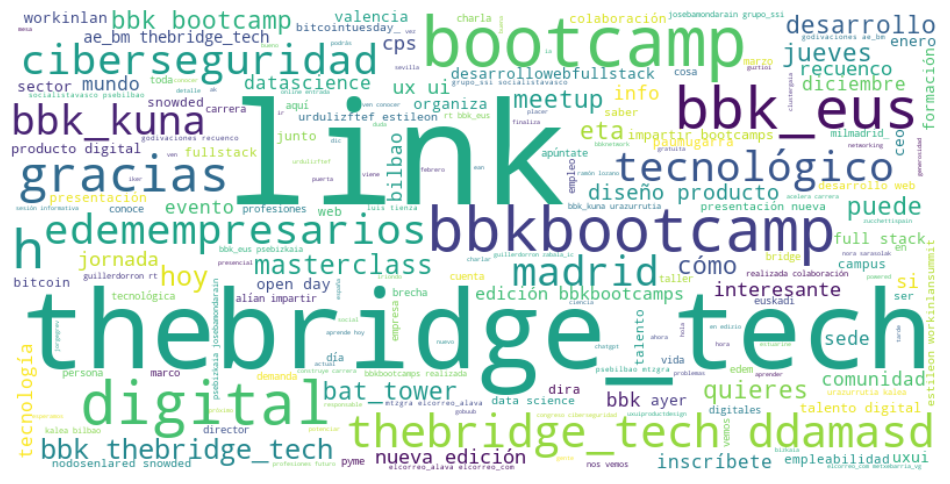

In [134]:
# Combine all the tweets into a single string
all_tweets = ' '.join(df_sum['text'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Plot the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


E - CORRELATION BETWEEN TWEET METRICS

In [148]:
import seaborn as sns

In [154]:
df_sum[['impression_count', 'like_count', 'quote_count', 'reply_count', 'retweet_count']].corr()

,impression_count,like_count,quote_count,reply_count,retweet_count
impression_count,1.000000,0.992925,0.594471,0.721834,0.928262
like_count,0.992925,1.000000,0.612718,0.734449,0.952474
quote_count,0.594471,0.612718,1.000000,0.447428,0.619491
reply_count,0.721834,0.734449,0.447428,1.000000,0.676978
retweet_count,0.928262,0.952474,0.619491,0.676978,1.000000


<AxesSubplot:>

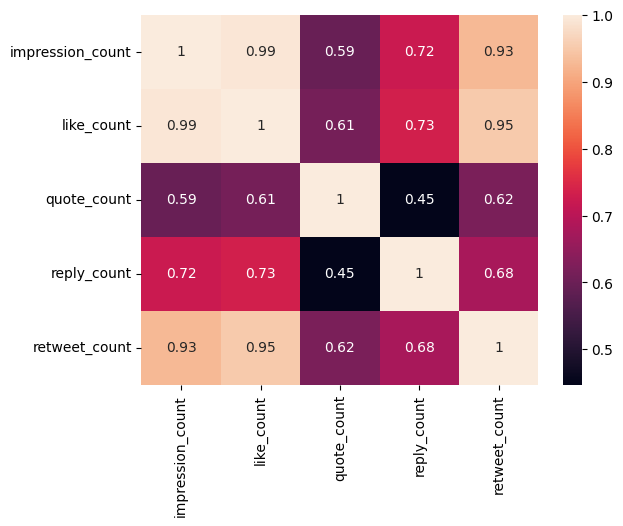

In [155]:
sns.heatmap(df_sum[['impression_count', 'like_count', 'quote_count', 'reply_count', 'retweet_count']].corr(), annot = True)

correlaciones muy fuertes entre todas pero especialmente entre impresiones y likes (tiene claro sentido porque los likes son las impresiones más faciles de obtener), entre likes y rt y entre impresiones y rt

F - OTHER CONCLUSSIONS: 
    - Impact of high followed people 
    - impact of having collaborating with relevant people in the field
    - low rt percentage


In [156]:
df_sum.to_csv('clean_data.csv')